In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)

physical_device = tf.config.experimental.list_physical_devices("GPU")
if len(physical_device) > 0:
    tf.config.experimental.set_memory_growth(physical_device[0], True)

2.2.0


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPooling1D

In [3]:
model = Sequential([
    Conv1D(filters=16, kernel_size=3, input_shape=(128, 64), 
           kernel_initializer='random_uniform', bias_initializer='zeros',
           activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(64, kernel_initializer='he_uniform', bias_initializer='ones',
          activation='relu')
])

In [5]:
model.add(Dense(64, 
                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
                bias_initializer=tf.keras.initializers.Constant(value=0.4),
                activation='relu'))

model.add(Dense(8,
                kernel_initializer=tf.keras.initializers.Orthogonal(gain=1.0, seed=None),
                activation='relu'))

In [6]:
import tensorflow.keras.backend as K

In [7]:
def my_init(shape, dtype=None):
    return K.random_normal(shape, dtype=dtype)

model.add(Dense(64, kernel_initializer=my_init))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 126, 16)           3088      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 31, 16)            0         
_________________________________________________________________
flatten (Flatten)            (None, 496)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                31808     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                5

In [10]:
import matplotlib.pyplot as plt

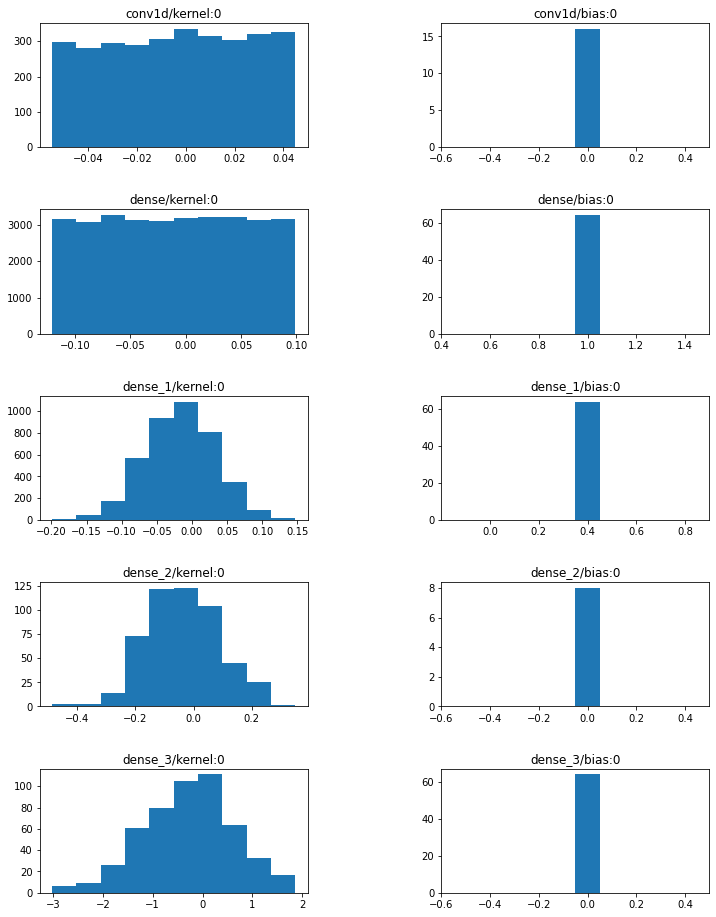

In [11]:
fig, axes = plt.subplots(5, 2, figsize=(12,16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Filter out the pooling and flatten layers, that don't have any weights
weight_layers = [layer for layer in model.layers if len(layer.weights) > 0]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)